In [1]:
import pickle
from matplotlib import pyplot as plt

### Read data.

Format `dict(page_id: dict(timestamp: visits_per_hour))`

The timestamps are encoded as list indexes. Index `0` correspond to start time `2018-07-31 22:00:00`. The last index of the list corresponds to final timestamp `2018-08-31 21:00:00`. Total number of hours is 743. 

Keys of `dict(timestamp: visits_per_hour)` correspond to list indexes. For example, if a page with `page_id` was visited `13` times at timestamp `2018-07-31 22:00:00`, this will correspond to the following record in the dictionary `{page_id: {0: 13}}`.

In [2]:
pickle_in = open("./data/activations_dict_json_graph.pickle","rb")

In [3]:
activations_dict = pickle.load(pickle_in)

In [4]:
hours = 743 # total number of hours

In [5]:
def unpack_dict(d, length):
    '''
    Unpacks dictionary `d` {list_index: value} into a list.
    `length` is total number of elements in the resulting list.
    
    Index corresponds to `list_index` and value at that index corresponds to `value`.
    I.e. list[list_index] = value
    Indexes missing in dictionary correspond to `0` values.
    '''
    l = [0] * length
    keys = list(d.keys())
    keys.sort()
    for key in keys:
        l[key] = d[key]
    return l

In [6]:
#unpack time-series into list
activations_dict_unpacked = {}
for k,v in activations_dict.items():
    activations_dict_unpacked[k] = unpack_dict(v, hours + 1)

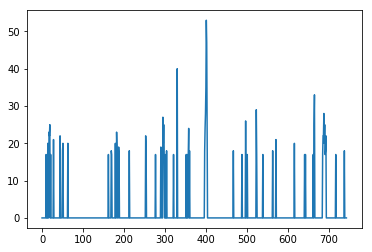

In [7]:
plt.plot(activations_dict_unpacked[734])